<a href="https://colab.research.google.com/github/KhalilPendari/DSML-Git2/blob/main/Aerofit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading data to colab.
df=pd.read_csv('/content/aerofit_treadmill.txt')


In [3]:
# Basic analysis
print('Shape of the data')
df.shape

Shape of the data


(180, 9)

There are 180 rows and 9 columns in dataframe.


In [5]:
#columns in a DataFrame
df.columns


Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [6]:
# data type of all columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
#First 5 rows of dataframe
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [8]:
# statistcal analysis of numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [9]:
# statistical summary of object columns
df.describe(include='object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


There are 3 object columns in dataframe

In [10]:
# Non-Graphical Analysis
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [11]:
df['Product'].unique()
# Value count

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are actually three types of products in aerofit.


In [12]:
round(df['Product'].value_counts(normalize=True)*100,2)


,proportion
Product,
KP281,44.44
KP481,33.33
KP781,22.22


44.44% customers of aerofit prefer to buy KP281 treadmil. 33.33% customers are buying KP481 treadmil. remaining 22.22% are buying KP781
treadmil.


In [13]:
df['Age'].unique()
# unique


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [14]:
df['Age'].value_counts().head()


,count
Age,
25,25
23,18
24,12
26,12
28,9


customers aging between 25-28 are the top 5 buyers of of aerofit products. customers having age of 25 purchased around 25 treadmils which
is highest among all age groups.


In [15]:
df['Gender'].unique()
# unique


array(['Male', 'Female'], dtype=object)

2 unique values are there in gender column.

In [16]:
round(df['Gender'].value_counts(normalize=True)*100,2)
# value_counts

,proportion
Gender,
Male,57.78
Female,42.22


57.78% customers of aerofit are male. 42.22% are female customers.

In [17]:
# MaritalStatus column
df['MaritalStatus'].unique()
#unique

array(['Single', 'Partnered'], dtype=object)

In [18]:
df['MaritalStatus'].nunique()
# nunique

2

There are two sub-categories in MaritalStatus column

1.Single

2.Partnered

In [19]:
# MaritalStatus value counts
round(df['MaritalStatus'].value_counts(normalize=True)*100,2)

,proportion
MaritalStatus,
Partnered,59.44
Single,40.56


In [20]:
# Aerofit has 59.44% partnered customers.
#40.56% are Single.

*Data Processing *

Handling missing values.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


There are no missing values in the dataframe.

Detecting outliers in the income column

In [22]:
df['Income'].describe()


,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [23]:
# we need 5 points to find out outliers in the income column
'''
1.q1(lower quartile)
2.q3(upper quartile)
3.IQR(Inter Quartile Region)
4.Lower bound
5.Upper bound
'''

In [25]:
q1=df['Income'].quantile(0.25)
q3=df['Income'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
median=df['Income'].median()
print(f'q1={q1}')
print(f'q2={q3}')
print(f'IQR={IQR}')
print(f'lower_bound={lower_bound}')
print(f'upper_bound={upper_bound}')
print(f'median={median}')



q1=44058.75
q2=58668.0
IQR=14609.25
lower_bound=22144.875
upper_bound=80581.875
median=50596.5


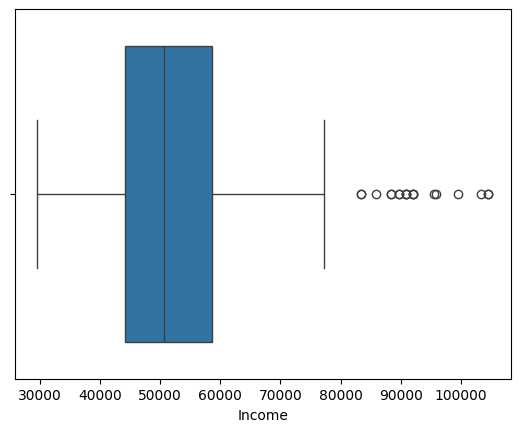

<Figure size 800x500 with 0 Axes>

In [26]:
sns.boxplot(df['Income'],orient='h')
plt.figure(figsize=(8,5))
plt.show()


As we can see there are outliers in the income column. all the values above 80581.875 are outliers.


In [27]:
# Total number of outliers in income column
len(df[df['Income']>upper_bound])


19

There are 19 outliers in the income column.

In [28]:
# % of outliers in the income column.


In [29]:
len(df[df['Income']>upper_bound])/len(df['Income'])*100

10.555555555555555

10.55% values of income column are outliers.

detecting outliers in miles column

In [30]:
df['Miles'].describe()


,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


In [31]:
# finding important points for finding outliers


In [32]:
q1_miles=np.quantile(df['Miles'],0.25)
q3_miles=np.quantile(df['Miles'],0.75)
IQR_miles=q3_miles-q1_miles

upper_bound_miles=IQR_miles*1.5+q3_miles
lower_bound_miles=q1_miles-IQR_miles*1.5
median_miles=df['Miles'].median()
print(f'q1_miles={q1_miles}')
print(f'q3_miles={q3_miles}')
print(f'IQR_miles={IQR_miles}')
print(f'upper_bound_miles={upper_bound_miles}')
print(f'lower_bound_miles={lower_bound_miles}')
print(f'median_miles={median_miles}')


q1_miles=66.0
q3_miles=114.75
IQR_miles=48.75
upper_bound_miles=187.875
lower_bound_miles=-7.125
median_miles=94.0


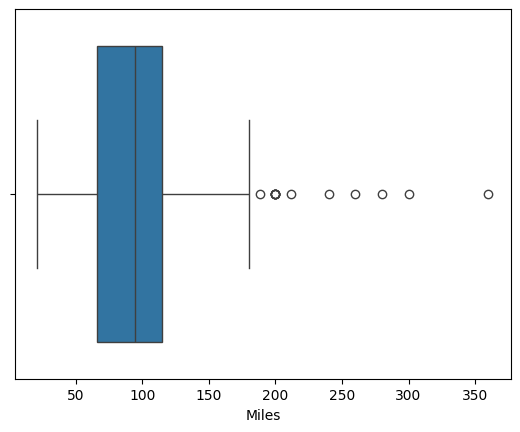

<Figure size 800x500 with 0 Axes>

In [33]:
# box plot of miles column
sns.boxplot(df['Miles'],orient='h')
plt.figure(figsize=(8,5))
plt.show()


In [34]:
# finding total number outliers in the miles column

In [35]:
miles_outliers=len(df[df['Miles']>upper_bound_miles])
print(f'total number of outliers in miles columnn is {miles_outliers}')


total number of outliers in miles columnn is 13


In [36]:
# % of outliers in miles column

In [37]:
miles_outlier_perc=miles_outliers/len(df['Miles'])*100
print(round(miles_outlier_perc,2))


7.22


In [38]:
# 7.22% values in the miles column are outliers.

In [40]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

Detecting outliers in Educaton,Age,fitness


In [41]:
q1_education=np.quantile(df['Education'],0.25)
q3_education=np.quantile(df['Education'],0.75)
IQR_education=q3_education-q1_education
upper_bound_education=q3_education+IQR_education*1.5
lower_bound_eduaction=q1_education-IQR_education*1.5

print(f'q1_education = {q1_education}')
print(f'q3_education = {q3_education}')
print(f'IQR_education = {IQR_education}')
print(f'upper_bound_education = {upper_bound_education}')
print(f'lower_bound_education = {lower_bound_eduaction}')

q1_education = 14.0
q3_education = 16.0
IQR_education = 2.0
upper_bound_education = 19.0
lower_bound_education = 11.0


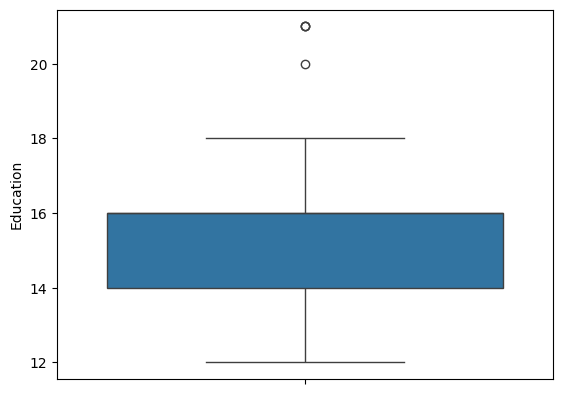

<Figure size 800x500 with 0 Axes>

In [42]:
sns.boxplot(df['Education'])
plt.figure(figsize=(8,5))
plt.show()


In [43]:
# count of outliers in education column

In [45]:
edu_outliers_data=df[df['Education']>upper_bound_education]
print(f'Total outliers in Education columns = {len(edu_outliers_data)}')
print(f'Percentage of outliers in Education column = {round(len(edu_outliers_data)/len(df["Education"])*100,2)}')

Total outliers in Education columns = 4
Percentage of outliers in Education column = 2.22


In [46]:
# Age
df['Age'].head()


,Age
0,18
1,19
2,19
3,19
4,20


Insights

1. outliers in the income column suggest that there few customers are having more income than rest.
2. outliers in the miles column suggest that some customers are walking or running significantly more than the others.


Adding more columns by converting numerical columns to categorical columns

converting age columns to sub_groups(Young,Middle_aged,Old) to derive some
valuable insights from particular age_group customers. **bold text**

**age groups**
1. Young(18-30)
2. Middle_aged(31-40)
3. Old(41-50)

In [49]:
df['Age_group']=pd.cut(df['Age'],bins=[17,30,40,50],labels=['Young','Middle_aged','Old'])

df['Age_group'].value_counts()


,count
Age_group,
Young,120
Middle_aged,48
Old,12


Insights:

1. Young customers having age between 18-30 are buying more products than other age group customers
2. Old aged customers(41-50) are the least buyers.

In [50]:
# similarly now categorising income column into 3 groups
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

Income_groups

1.Low(29000-50000)

2.Medium(500001-75000)

3.High(75001-105000)


In [51]:
df['Income_group']=pd.cut(df['Income'],bins=[29000,50000,75000,105000],labels=['Low','Medium','High'])

df['Income_group'].value_counts()

,count
Income_group,
Low,83
Medium,76
High,21


Univariate analysis categorical column

Treadmills distribution among areofit customers


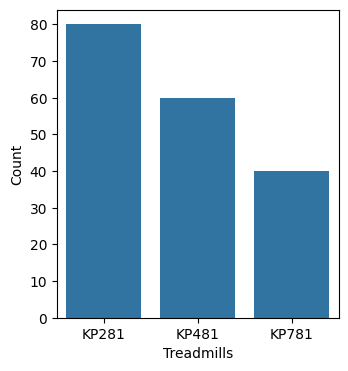

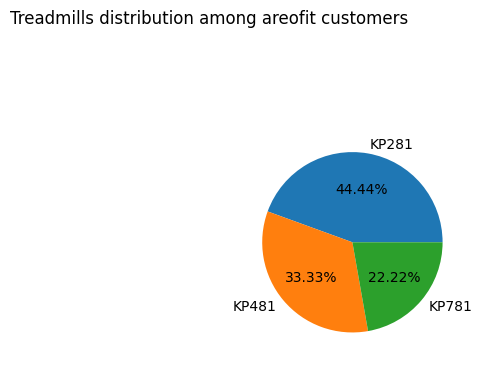

In [52]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.countplot(x=df['Product'])
plt.xlabel('Treadmills')
plt.ylabel('Count')
plt.show()
plt.subplot(1,2,2)
plt.pie(df['Product'].value_counts(),labels=df['Product'].value_counts().index,autopct='%.2f%%')
plt.suptitle('Treadmills distribution among areofit customers')
plt.show()

Insights
1. 44.44% of total Aerofit customers using to buy KP281 treadmills. 33.33% opt for KP481 treadmill. Only 22.22% are using KP781 treadmill.
2. KP281 being the more affordbale treadmill preferred by most customers.
3. KP781 treadmill is the costlier than other 2 treadmills.

**Recommondations**
1. Emphasize the budget-friendly nature of the KP281 treadmill to attract more customers.
2. Focus marketing efforts on reaching out to mid-level runners, emphasizing how the KP481 is tailored to meet their specific fitness needs
and goals.
3. Emphasize the unique features and benefits of the KP781 to justify its higher price. Highlight its advanced functionalities and how they
enhance the workout experience, making it worth the investment.


In [53]:
df.describe(include='object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [54]:
# distribution of treadmills among gender

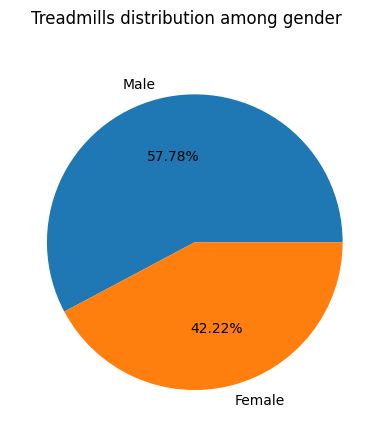

In [55]:
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%.2f%%')
plt.suptitle('Treadmills distribution among gender')
plt.show()

Insights
1. 57.78% users are male in aerofit. Rest 42.22% are females.


Recommendations
1. Create targeted advertisements and promotions that appeal to women, showcasing how fitness can positively impact their lives.
2.Showcase the female-friendly features and benefits of Aerofit treadmills to attract more female customers.

In [56]:
# distribution of treadmill among marital status

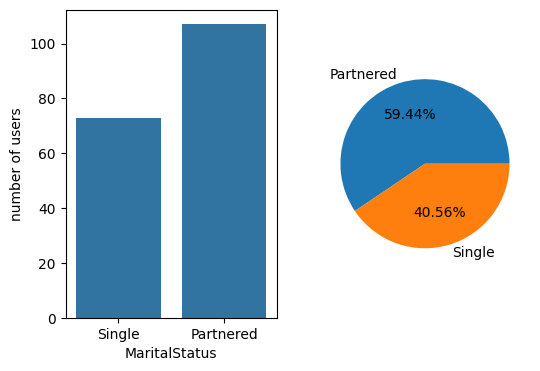

In [57]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=df['MaritalStatus'])
plt.ylabel('number of users')
plt.subplot(1,2,2)
plt.pie(df['MaritalStatus'].value_counts(),labels=df['MaritalStatus'].value_counts().index,
autopct='%.2f%%')
plt.show()


Insights
1. 59.44% customers are married, while remaining 40.56% are unmarried.


Recommendations
1. create advertisements and promotions showcasing how being fit can change the mentality and stress of a person to attract more
unmarried customers.

In [58]:
# distribution of treadmill over age_group


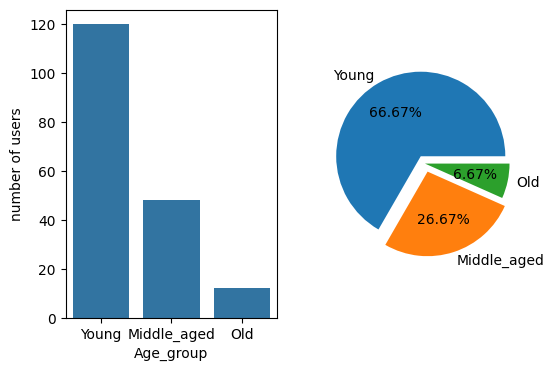

In [61]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=df['Age_group'])
plt.ylabel('number of users')

plt.subplot(1,2,2)
plt.pie(df['Age_group'].value_counts(),labels=df['Age_group'].value_counts().index,
autopct='%.2f%%',explode=[0.1,0.1,0])
plt.show()

Insights
1. Aerofit has 66.67% young age users(18-30).
2. 26.67% users are middle_aged users.
3. Old aged users are the least users of Aerofit products with only 6.67%.

Recommendations
1. Offer personalized assistance to help customers aged 40-50 select the ideal treadmill model, providing them with the tools to maintain an
active and healthy lifestyle. With Aerofit's expert guidance, customers can feel confident and motivated to make the most of their
treadmills effectively.


In [62]:
# distribution of treadmills over income group

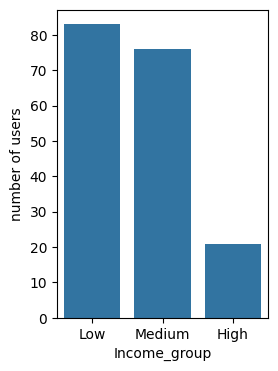

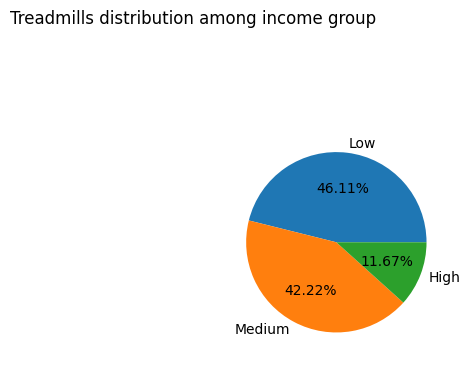

In [63]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=df['Income_group'])
plt.ylabel('number of users')
plt.show()
plt.subplot(1,2,2)
plt.pie(df['Income_group'].value_counts(),labels=df['Income_group'].value_counts().index,
autopct='%.2f%%')
plt.suptitle('Treadmills distribution among income group')
plt.show()

Insights
1. 88.33 customers of Aerofit belongs to low income and middle income groups.
2. Remaining 11.67 % belong to high income group.


Recommendations.
1. Highlight the advance features of KP781 treadmills to high income group customers by creating advertisement and promotions that can
cater the needs of high income people.
2. offer discount and incentives on treadmills to attract more customers.

**Numeric columns**


In [64]:
# distribution over age


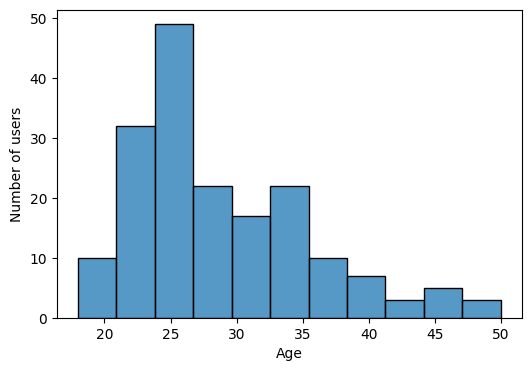

In [65]:
plt.figure(figsize=(6,4))

sns.histplot(df['Age'])
plt.ylabel('Number of users')
plt.show()

Insights
1. most buyers are from between 20-30 years of age. And they are high probability of buying aerofit products.
2. 40-50 age users are using less aerofit products. Probability of them buying the products is very low.


In [66]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Age_group', 'Income_group'],
      dtype='object')

In [67]:
# distribution over income

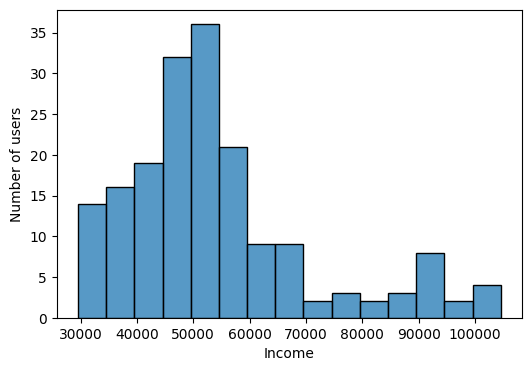

In [69]:
plt.figure(figsize=(6,4))

sns.histplot(df['Income'])
plt.ylabel('Number of users')
plt.show()


Insights
1. people earning between 40000-60000 are using more Aerofit products than others. probability of them buying aerofit products are more.
2. users with income around 80000 are having less probability to buy aerofit products.


In [70]:
# distribution over education


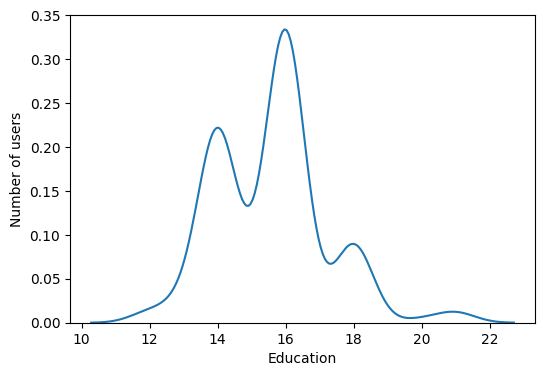

In [72]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['Education'])
plt.ylabel('Number of users')
plt.show()


Insights
1. customers with 16 years of education are the primary purchasers of Aerofit treadmills.
2. customers with education more than 18 years have a significantly lower probability of purchasing the aerofit treadmills.


In [73]:
# distribution of fitness levels


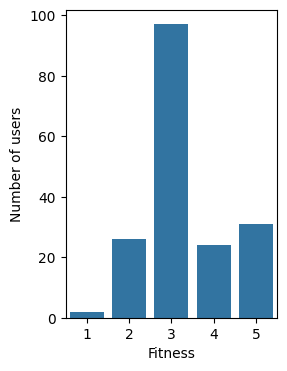

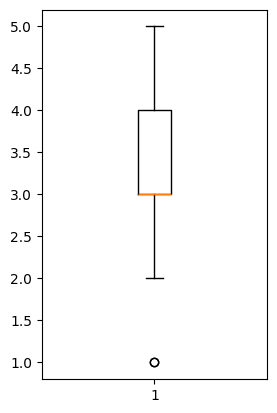

In [74]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=df['Fitness'])
plt.ylabel('Number of users')
plt.show()

plt.subplot(1,2,2)
plt.boxplot(df['Fitness'])
plt.show()

Insights 1.customers with fitness level 3 are having higher probability of buying aerofit treadmills.
2. customers with fitness level 1 have a significantly lower probability of purchasing aerofit treadmills.


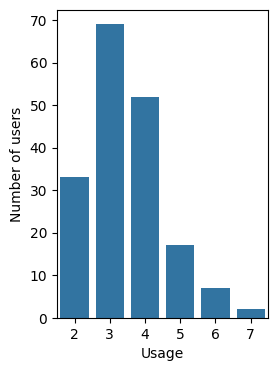

In [77]:
# distribution of usage

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x=df['Usage'])
plt.ylabel('Number of users')
plt.show()


Insights
1. The majority of aerofit customers are using treadmills 3 times a week and there is a high probability of them purchasing treadmills.

Text(0, 0.5, 'Number of users')

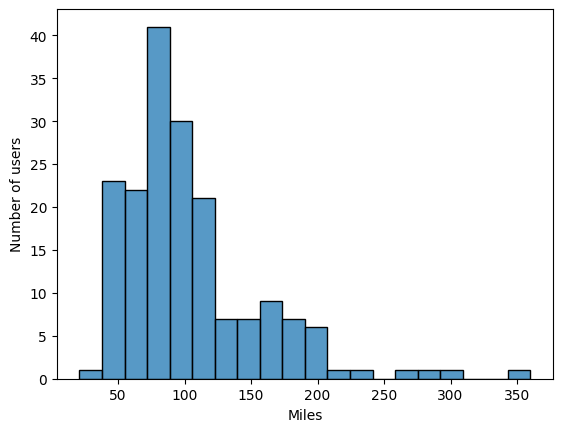

In [78]:
# Distribution of Miles
sns.histplot(data=df,x='Miles')
plt.xlabel('Miles')
plt.ylabel('Number of users')


Insights
1. Customers who run 90-100 miles per week show a preference for using Aerofit treadmills.
2. Hardcore runners, averaging 200-250 miles per week, tend to prefer jogging over using Aerofit treadmills.

Decriptive statistics for numeric columns

In [81]:
for col in df.select_dtypes(np.number):
  mean=df[col].mean().round(2)
  median=round(df[col].median(),2)
  variance=round(df[col].var(),2)
  standard_deviation=round(df[col].std(),2)
  min=df[col].min()
  max=df[col].max()
  q1=np.quantile(df[col],0.25)
  q3=np.quantile(df[col],0.75)
  IQR=q3-q1
  upper_bound=q3+1.5*IQR
  lower_bound=q1-IQR*1.5

  print(f'*****Descriptive statistics of {col} column*****')
  print(f'mean = {mean}')
  print(f'median = {median}')
  print(f'variance = {variance}')
  print(f'standard_deviation = {standard_deviation}')
  print(f'min = {min}')
  print(f'max = {max}')
  print(f'25_percentile = {q1}')
  print(f'75_percentile = {q3}')
  print(f'Inter Quartile Range = {IQR}')
  print(f'upper_bound = {upper_bound}')
  print(f'lower_bound = {lower_bound}')
  print()


*****Descriptive statistics of Age column*****
mean = 28.79
median = 26.0
variance = 48.21
standard_deviation = 6.94
min = 18
max = 50
25_percentile = 24.0
75_percentile = 33.0
Inter Quartile Range = 9.0
upper_bound = 46.5
lower_bound = 10.5

*****Descriptive statistics of Education column*****
mean = 15.57
median = 16.0
variance = 2.61
standard_deviation = 1.62
min = 12
max = 21
25_percentile = 14.0
75_percentile = 16.0
Inter Quartile Range = 2.0
upper_bound = 19.0
lower_bound = 11.0

*****Descriptive statistics of Usage column*****
mean = 3.46
median = 3.0
variance = 1.18
standard_deviation = 1.08
min = 2
max = 7
25_percentile = 3.0
75_percentile = 4.0
Inter Quartile Range = 1.0
upper_bound = 5.5
lower_bound = 1.5

*****Descriptive statistics of Fitness column*****
mean = 3.31
median = 3.0
variance = 0.92
standard_deviation = 0.96
min = 1
max = 5
25_percentile = 3.0
75_percentile = 4.0
Inter Quartile Range = 1.0
upper_bound = 5.5
lower_bound = 1.5

*****Descriptive statistics of Inco

Univariate Analyisis


Distribution of each treadmill over gender


In [82]:
gender_df=df.groupby(['Product','Gender']).size().unstack()
gender_df

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


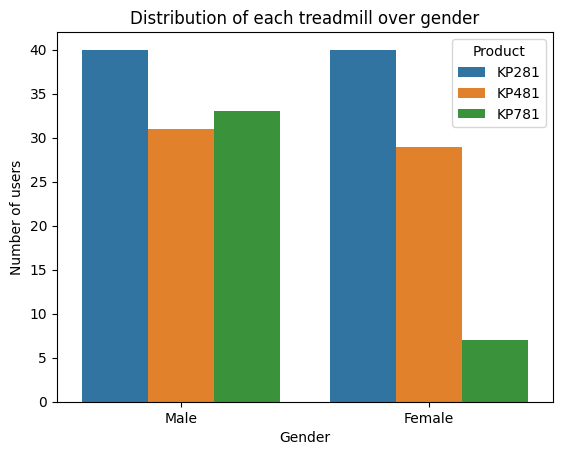

In [84]:
plt.title('Distribution of each treadmill over gender')
sns.countplot(x=df['Gender'],hue=df['Product'])
plt.ylabel('Number of users')
plt.show()



Insights
1. Both male and female prefer using KP281 treadmills due to its entry level status and cost effective compared to ther 2 treadmills.
2. Both male and female customers equally prefer the KP481 treadmill
3. among males KP781 is most prefer after KP281 due to its advance features. But not so popular among females customers.


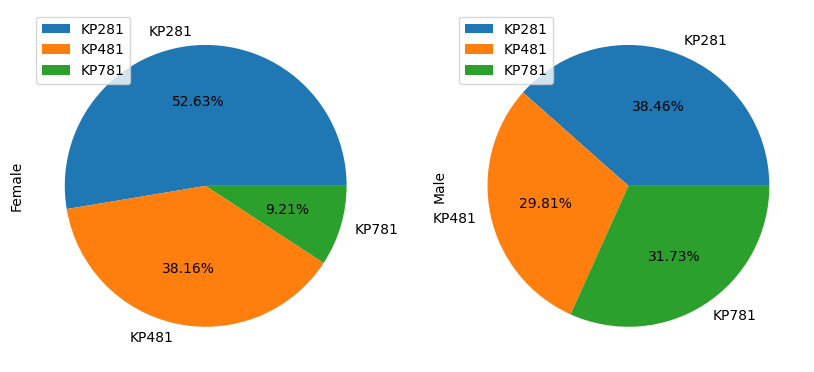

In [85]:
gender_df.plot(kind='pie',subplots=True,figsize=(10,6),autopct='%.2f%%')
plt.show()

Insights
1. among female customers 52.63% are prefering KP281 treadmill due to its its cost effective and its entry level features. while 38.16% are
prefering KP481 treadmill due to value to their money and only 9.21% are prefering KP781 treadmill due to its higher cost compare other
two.
2. among male customers 38.46% prefer using KP281 treadmills. while 31.73% opt for KP781 treadmills due to its advance features. only
29.81% are prefering KP481.


In [86]:
# distribution of treadmills over marital status

MaritalStatus=df.groupby(['Product','MaritalStatus']).size().unstack()
MaritalStatus


MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


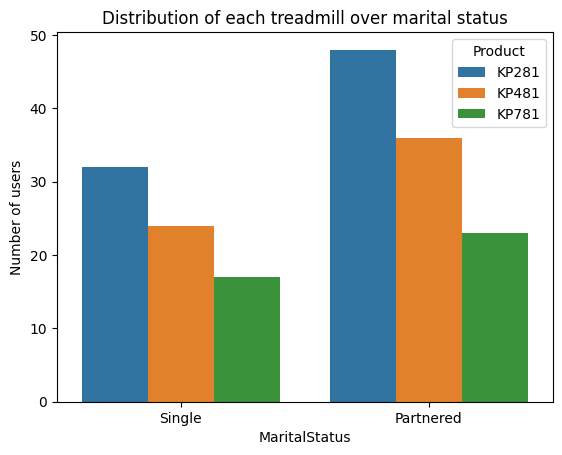

In [87]:
plt.title('Distribution of each treadmill over marital status')
sns.countplot(x=df['MaritalStatus'],hue=df['Product'])
plt.ylabel('Number of users')
plt.show()

Insights
1. partnered customers are higher higher probability of purchasing KP281 treadmills than single customers.
2. KP481 is used by partnered customers a lot than single customers thus increasing their probability of buying it.
3. The use of product KP781 by both male and female is lesser than the products the other 2 products.

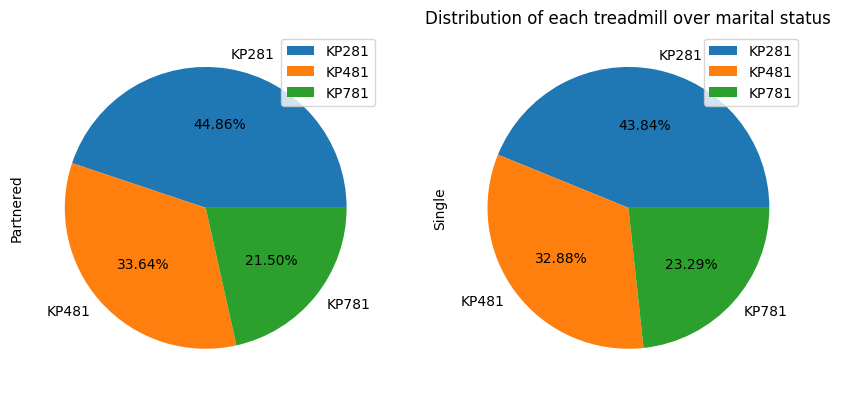

In [88]:
MaritalStatus.plot(kind='pie',subplots=True,figsize=(10,6),autopct='%.2f%%')
plt.title('Distribution of each treadmill over marital status',loc='center')
plt.show()

Insights
1. among married customers the purchase distribution is as follows: 44.86% prefer KP281,33.6% prefer KP481, only 21.50% prefer KP781.
2. among single customers the purchase distribution is as follows: 43.84% prefer KP281, 32.88% prefer KP481, remaining 23.29% prefer .

In [89]:
# distribution of purchases of tradmills over age_group

df_age_group=df.groupby(['Product','Age_group']).size().unstack()
df_age_group


Age_group,Young,Middle_aged,Old
Product,,,
KP281,55,19,6
KP481,35,23,2
KP781,30,6,4


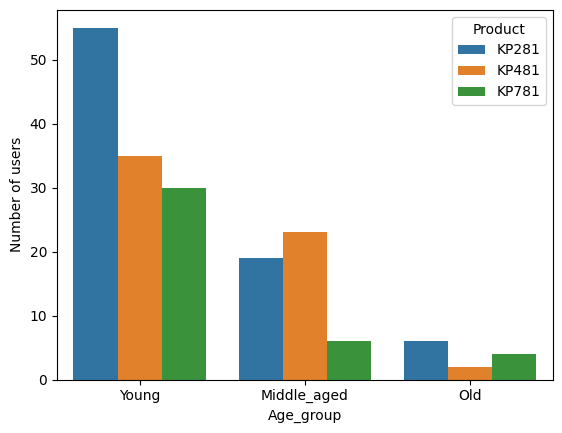

-----Age groups----
Young---(18-30)
Middle_aged---(31-40)
Old---(41-50)


In [90]:
sns.countplot(x=df['Age_group'],hue=df['Product'])
plt.ylabel('Number of users')
plt.show()
print('-----Age groups----')
print('Young---(18-30)')
print('Middle_aged---(31-40)')
print('Old---(41-50)')


Insights
1. The majority of young users prefer the KP281 treadmill over the other two options. However, there is a significant number of young people
using the KP781 treadmill, likely drawn to its advanced features.
2. KP481 treadmills are more popular among middle_aged customers compare to other 2 treadmills.
3. The of old age customer significantly is lesser compare to other 2 groups.


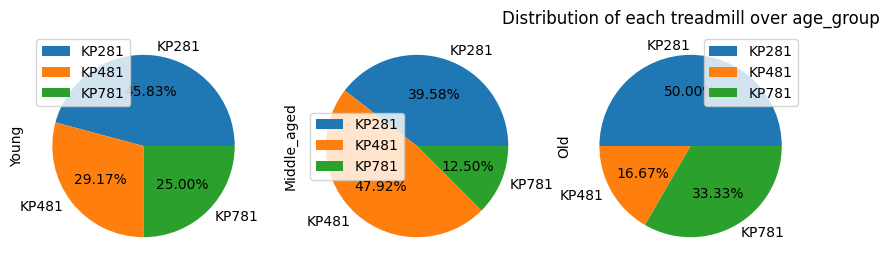

In [92]:
df_age_group.plot(kind='pie',subplots=True,autopct='%.2f%%',figsize=(10,6))
plt.title('Distribution of each treadmill over age_group',loc='center')
plt.show()


Insights 1.Among young customers(18-30 age) purchase distribution is as follows: 44.83% prefer KP281 treadmills, while 29.17% prefer KP481,
remaining 25% prefer KP781.
2. Among middle_aged customers(31-40 age) purchase distribution is as follows: 39.58% prefer KP281 treadmills, while 47.92% prefer
KP481, remaining 12.50% prefer KP781.
3. Among Old_aged customers(41_50 age) purchase distribution is as follows: 50% prefer KP281 treadmills, while 16.67% prefer KP481,
remaining 33.33% prefer KP781

In [93]:
# distribution treadmill purchases across income_groups

df_income_group=df.groupby(['Product','Income_group']).size().unstack()
df_income_group


Income_group,Low,Medium,High
Product,,,
KP281,48,32,0
KP481,30,30,0
KP781,5,14,21


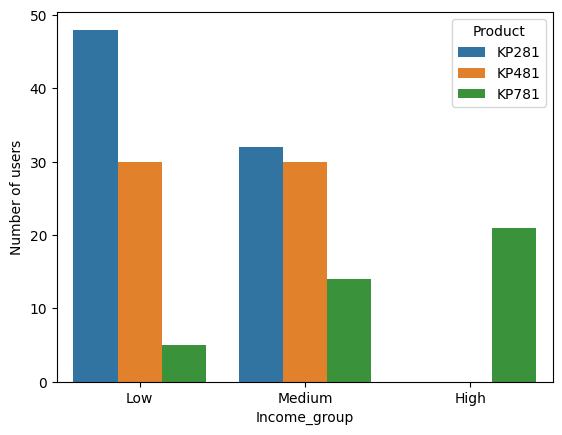

-----Income_groups----
low---(29000-50000)
Medium---(50000-75000)
High---(75000-105000


In [94]:
sns.countplot(x=df['Income_group'],hue=df['Product'])
plt.ylabel('Number of users')
plt.show()

print('-----Income_groups----')
print('low---(29000-50000)')
print('Medium---(50000-75000)')
print('High---(75000-105000')


Insights
1. low income most preferred income is KP281 as it is cost effective.
2. KP481 and KP281 treadmiills are having equal number of low and medium income earning people.
3. KP781 trailmills are purchased by only high income people due to its high price.


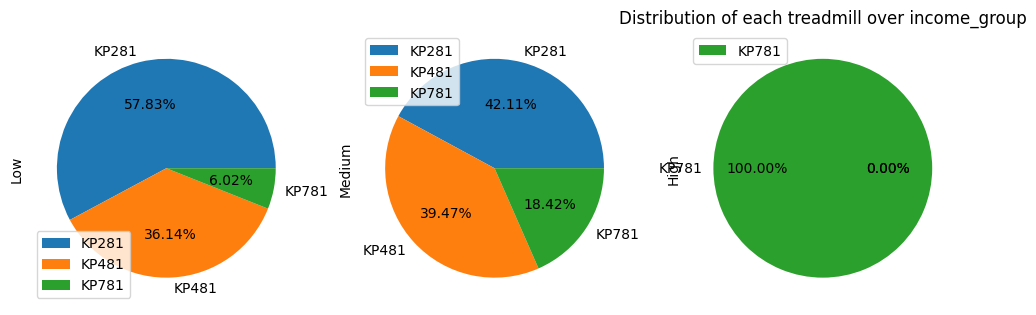

In [95]:
df_income_group.plot(kind='pie',subplots=True,autopct='%.2f%%',figsize=(12,6))
plt.title('Distribution of each treadmill over income_group')
plt.legend(loc='upper left')
plt.show()


Insights
1. Among low income customers distribution is as follow: 57.83% prefer KP281, while 36.14% prefer KP481, remaining 6.02%
2. Among Medium income customers distribution is as follows: 42.11% of medium income customer prefer KP281 treadmill, KP481
treadmill and KP781 treadmill have 39.47% and 18.42% customers respectively.
3. KP781 have only high income customers due to its high price.

Conditional and marginal probabilities

In [96]:
# Impact of gender on treadmill purchase

In [97]:
pd.crosstab(index=df['Product'],columns=df['Gender'],normalize=True,margins=True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


Marginal probabilities
1. P(KP281) = 0.44
2. P(KP481) = 0.33
3. P(KP781) = 0.22
4. p(Male) = 0.58
5. P(Female) = 0.42

Conditional Probabilities
1. P(KP281|Male) = 0.22
2. P(KP281|Female) = 0.22
3. P(KP481|Male) = 0.17
4. P(KP481|Female) = 0.16
5. P(KP781|Male) = 0.18
6. P(KP781|Female) = 0.04


In [99]:
# impact of age_group on treadmills purchase

pd.crosstab(index=df['Product'],columns=df['Age_group'],normalize=True,margins=True).round(2)

Age_group,Young,Middle_aged,Old,All
Product,,,,
KP281,0.31,0.11,0.03,0.44
KP481,0.19,0.13,0.01,0.33
KP781,0.17,0.03,0.02,0.22
All,0.67,0.27,0.07,1.00


Marginal Probability
1. P(KP281) = 0.44
2. P(KP481) = 0.33
3. P(KP781) = 0.22
